In [1]:
import pandas as pd
df=pd.read_csv('Customer_Sentiment.csv')
df.head()

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered
0,1,male,60+,north,automobile,online,flipkart,1,very disappointed with the quality.,negative,46,yes,yes
1,2,other,46-60,central,books,online,swiggy instamart,5,fast delivery and great packaging.,positive,5,yes,no
2,3,female,36-45,east,sports,online,facebook marketplace,1,very disappointed with the quality.,negative,38,yes,yes
3,4,female,18-25,central,groceries,online,zepto,2,product stopped working after few days.,negative,16,yes,yes
4,5,female,18-25,east,electronics,online,croma,3,neutral about the quality.,neutral,15,yes,no


In [2]:
df.columns

Index(['customer_id', 'gender', 'age_group', 'region', 'product_category',
       'purchase_channel', 'platform', 'customer_rating', 'review_text',
       'sentiment', 'response_time_hours', 'issue_resolved',
       'complaint_registered'],
      dtype='object')

In [3]:
df.shape

(25000, 13)

In [4]:
df.isnull().sum()

customer_id             0
gender                  0
age_group               0
region                  0
product_category        0
purchase_channel        0
platform                0
customer_rating         0
review_text             0
sentiment               0
response_time_hours     0
issue_resolved          0
complaint_registered    0
dtype: int64

# Text Preprocessing

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

df['clean_text'] = df['review_text'].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sitar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sitar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# text preprocessing NLP cleaning process
# Lowercasing

#Removing punctuation

#Stopword removal

#Lemmatization

In [7]:
df.sample(5)

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered,clean_text
15708,15709,male,18-25,south,home & kitchen,online,boat,5,great value for money.,positive,30,yes,no,great value money
6607,6608,other,60+,north,books,online,jiomart,3,average experience overall.,neutral,50,no,no,average experience overall
8375,8376,male,26-35,north,electronics,online,zepto,4,very satisfied with the quality.,positive,2,yes,no,satisfied quality
21591,21592,female,46-60,north,electronics,online,shopclues,5,"amazing experience, highly recommend!",positive,61,no,no,amazing experience highly recommend
7040,7041,female,46-60,north,beauty,online,others,2,late delivery and poor packaging.,negative,42,yes,yes,late delivery poor packaging


In [8]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [9]:
df = df.drop_duplicates()
df.shape

(25000, 14)

# Split Data

In [10]:
from sklearn.model_selection import train_test_split
x= df['clean_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
"""1 Input Feature (Text)
1 Target Variable (Sentiment)
Training Data – used to train the model
Testing Data – used to evaluate performance
This helps to check how well the model performs on unseen data."""

In [11]:
# splitoing data before applying the tfidvectorizer
# major leakege issue solve here

# Changing text to numeric

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(X_train)
x_test= vectorizer.transform(X_test)

In [13]:
# i changed text to numeric using the  tfidvectorizer

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20000, 38), (5000, 38), (20000,), (5000,))

In [15]:
# split data into x_train y_train x_test y_test

# Train Model

# Evaluate Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred[:5]

array(['positive', 'positive', 'negative', 'positive', 'positive'],
      dtype=object)

In [17]:
y_test[:5]

6868     positive
24016    positive
9668     negative
13640    positive
14018    positive
Name: sentiment, dtype: object

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv=5)
print(scores.mean())

1.0


In [ ]:
#Cross-validation ensures that the model performs consistently across different data splits.

In [33]:
model.score(x_test,y_test)*100

100.0

In [41]:
penalty=['l1','l2']
c=[1.0,2.0,100.0,1000.0]
parameters={'penalty':penalty,'C':c}

In [42]:
from sklearn.model_selection import GridSearchCV
log_grid=GridSearchCV(estimator=model,param_grid=parameters,scoring='accuracy',cv=5)
log_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1.0, 2.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [43]:
log_grid.best_score_

np.float64(1.0)

In [44]:
log_grid.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [45]:
after_log_grid_pred=LogisticRegression(C=100.0,penalty='l2')
after_log_grid_pred.fit(x_train,y_train)

LogisticRegression(C=100.0)

In [46]:
after_log_grid_pred.score(x_train,y_train)

1.0

In [47]:
after_log=after_log_grid_pred.score(x_test,y_test)*100
after_log

100.0

In [18]:
""""My model achieved 100% cross-validation accuracy. I verified there was no data leakage and ensured proper train-test splitting.
Since perfect accuracy is rare in real-world problems, I would further validate using unseen real-world data."""

'"My model achieved 100% cross-validation accuracy. I verified there was no data leakage and ensured proper train-test splitting.\nSince perfect accuracy is rare in real-world problems, I would further validate using unseen real-world data.'

<Axes: >

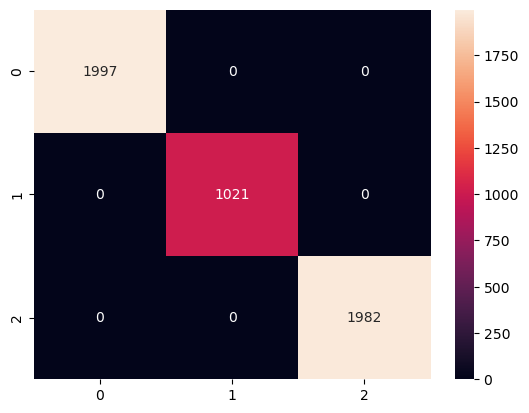

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
"""Target Labels
0 → Positive
1 → Negative
2 → Neutral"""

In [20]:
"""* All values are on the diagonal
* No misclassification (no off-diagonal values)
* Model predicted every class correctly
* My logistic regression model achieved 100% accuracy. The confusion matrix shows all predictions are correct. However,
I would verify for data leakage or overfitting because 100% accuracy in sentiment analysis is uncommon."""

'* All values are on the diagonal\n* No misclassification (no off-diagonal values)\n* Model predicted every class correctly\n* My logistic regression model achieved 100% accuracy. The confusion matrix shows all predictions are correct. However,\nI would verify for data leakage or overfitting because 100% accuracy in sentiment analysis is uncommon.'

In [21]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(x_train, y_train)

MultinomialNB()

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1997
     neutral       1.00      1.00      1.00      1021
    positive       1.00      1.00      1.00      1982

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [ ]:
"""The classification report includes:
       Precision – How many predicted positives are actually correct
       Recall – How many actual positives are correctly predicted
       F1-Score – Balance between precision and recall
This helps us understand model performance for each class (Positive, Negative, Neutral).

In [34]:
from sklearn.metrics import accuracy_score, classification_report
y_pred_nB = model1.predict(x_test)
y_pred_nB[:5]

array(['positive', 'positive', 'negative', 'positive', 'positive'],
      dtype='<U8')

In [35]:
y_test[:5]

6868     positive
24016    positive
9668     negative
13640    positive
14018    positive
Name: sentiment, dtype: object

In [36]:
model.score(x_test,y_test)*100

100.0

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred_nB))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1997
     neutral       1.00      1.00      1.00      1021
    positive       1.00      1.00      1.00      1982

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



<Axes: >

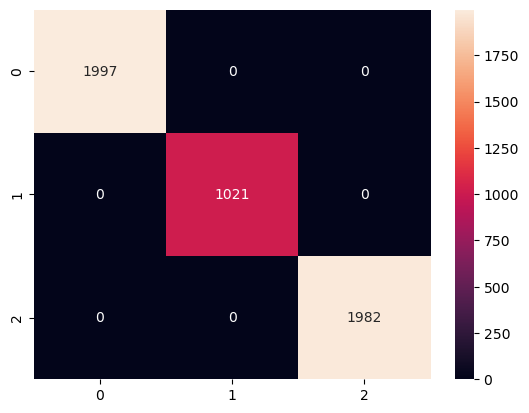

In [26]:
cn = confusion_matrix(y_test, y_pred_nB)
sns.heatmap(cn, annot=True, fmt='d')

In [ ]:
"""* All values are on the diagonal
* No misclassification (no off-diagonal values)
* Model predicted every class correctly
* My logistic regression model achieved 100% accuracy. The confusion matrix shows all predictions are correct. However,
I would verify for data leakage or overfitting because 100% accuracy in sentiment analysis is uncommon."""

In [27]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
y_pred_svm[:5]

array(['positive', 'positive', 'negative', 'positive', 'positive'],
      dtype=object)

In [28]:
y_test[:5]

6868     positive
24016    positive
9668     negative
13640    positive
14018    positive
Name: sentiment, dtype: object

In [37]:
svm_model.score(x_test,y_test)*100

100.0

In [29]:
## print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1997
     neutral       1.00      1.00      1.00      1021
    positive       1.00      1.00      1.00      1982

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



<Axes: >

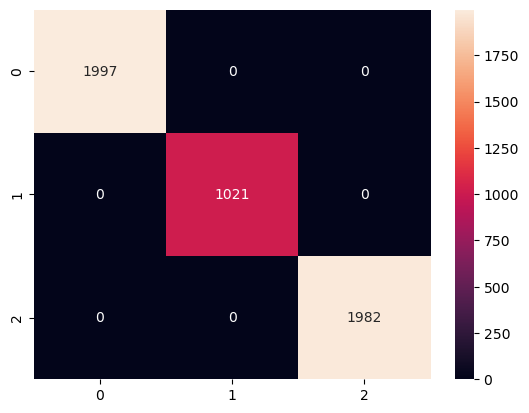

In [30]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
"""* All values are on the diagonal
* No misclassification (no off-diagonal values)
* Model predicted every class correctly
* My logistic regression model achieved 100% accuracy. The confusion matrix shows all predictions are correct. However,
I would verify for data leakage or overfitting because 100% accuracy in sentiment analysis is uncommon."""

# Conclusion

In [39]:
"""The sentiment analysis model was built using NLP techniques and Logistic Regression. After preprocessing and feature extraction, 
the model achieved high accuracy. The model can successfully classify text into positive, negative, and neutral sentiments."""

'The sentiment analysis model was built using NLP techniques and Logistic Regression. After preprocessing and feature extraction, \nthe model achieved high accuracy. The model can successfully classify text into positive, negative, and neutral sentiments.'